**Portfólio feito por Matheus Amaral da Rocha (portfólio simples)**

**Analisando E - Commerce em busca de gerar insights**

**Objetivo : obter a categoria mais vendida 
( para estudo, dar foco e buscar aumentar a receita[ganhos] sobre ela )
e um eventual erro que pode ser cometido por alguem que esteja ingressando na área de dados.**

In [129]:
# o passo mais importante de todas as analises ( o framework que fará as análises 
# serem possiveis ), importando o ótimo e indispensavel Pandas.

import pandas as pd

In [130]:
df = pd.read_csv('ecommerce.csv')

In [131]:
# Obtendo informações sobre nosso dataframe ( passo importante e também indispensável
# para avaliarmos os tipos das colunas e eventuais valores nulos )

df.info()

# Notamos que não há 
# valores nulos, o que é muito bom porque não precisaremos tratar-los

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [132]:
# Chamando as 3 primeiras linhas do nosso dataframe com .head(), 
# a fim de ter uma noção de quais informações temos
# e trabalharmos encima delas

df.head(3)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024


**Decidi ir primeiramente pelo caminho da categoria mais vendida , isso poderia,
por exemplo, ajudar minha empresa a dar ênfase em uma categoria especifica,
claro, sem abandonar as demais, porém priorizar a que vende mais,e
consequentemente a que trará mais lucro**


In [133]:
# Aqui fiz um agrupamento por categoria fazendo uma contagem da própria coluna
# 'categoria' a fim de descobrir qual valor mais se repete, no nosso caso, qual
# nome da categoria mais se repete, e esse será nossa categoria que mais vende.
# Usei um reset index para reiniciarmos nosso indice do nosso dataframe e
# em seguida usei sort_values para ordenar os valores em ordem decrescente
# para sabermos sem precisar decorar a ordem do maior pro menor ( categoria 
# mais vendida para a menos vendida )

categoria = df.groupby('Category')['Category'].value_counts().reset_index().sort_values(by = 'count',
                                                                                        ascending = False)
# Aqui abaixo nosso resultado:

categoria                                                                                      

,Category,count
4,Home & Kitchen,549
1,Books,534
2,Clothing,531
6,Toys,523
5,Sports,520
0,Beauty,505
3,Electronics,498


In [134]:
# Uma análise simples ja foi o suficiente para descobrirmos as top-categorias,
# agora vou deixar isso mais visual com nosso bom e velho amigo matplotlib

import matplotlib.pyplot as plt

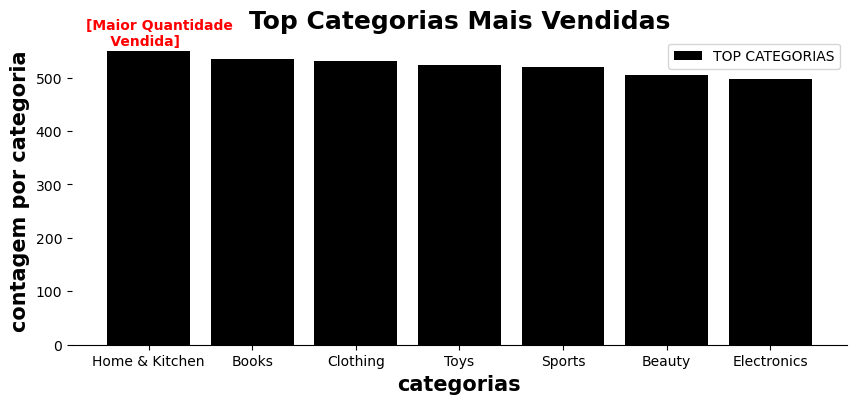

In [135]:
# Aqui resolvi plotar um gráfico removendo toda poluição visual existente

fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(categoria['Category'], categoria['count'], color = 'black', label = 'top categorias'.upper())
ax.set_title('top categorias mais vendidas'.title(), fontweight = 'bold', color = 'black', fontsize = 18)
ax.set_ylabel('contagem por categoria', fontsize = 15, fontweight = 'bold')
ax.set_xlabel('categorias',fontsize = 15, fontweight = 'bold')
ax.legend()
ax.grid(False)
ax.yaxis.set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.annotate('[maior quantidade\n     vendida]'.title(), (-0.6, 560), color = 'red', fontweight = 'bold')
plt.show()

**Através do grafico acima, descobrimos que items para a casa e cozinha, são os mais vendidos (em quantidades),
mas só com isso podemos tomar a decisão final de qual categoria devemos dar enfase ( nosso objetivo com essa
análise ) ? a resposta é NÃO!!! , e irei mostrar o porque abaixo!!!**

**Nossa categoria acima realmente é a que está, de fato, dando maior lucro por vender maior quantidade?,
não exatamente, e descobrimos abaixo o porque e qual , de fato, está dando o maior lucro para a empresa que trabalho**

In [136]:
# com esse simples agrupamento somando o preço final pago por todos os produtos de suas respectivas categorias,
# descobrimos a verdadeira categoria que mais nos trará lucros, mesmo estando em 3° colocação na categoria
# mais vendida, somando o valor do total de vendas , descobrimos que roupas , nos trazem mais lucro do que
# items de casa e cozinha (e com uma vantagem considerável em relação ao outros 2)
# Veja abaixo o resultado (usei head(3) pra deixar somente as 3 categorias com mais venda)!!!

resultado = df.groupby('Category')['Final_Price(Rs.)'].sum().reset_index().sort_values(by = 'Final_Price(Rs.)',
                                                                           ascending = False).head(3)

In [137]:
resultado

,Category,Final_Price(Rs.)
2,Clothing,115314.84
1,Books,111149.35
4,Home & Kitchen,110328.08


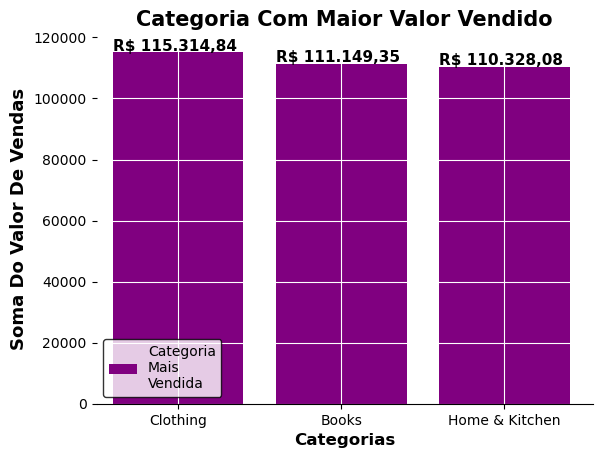

In [138]:
# Agora vou fazer uma visualização com gráfico dos verdadeiros vencedores (top 3)

fig, ax = plt.subplots()
ax.bar(resultado['Category'], resultado['Final_Price(Rs.)'], label = 'categoria\nmais\nvendida'.title(), color = 'purple')
ax.set_title('categoria com maior valor vendido'.title(), 
             fontweight = 'bold', 
                     fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('soma do valor de vendas'.title(), 
              fontweight = 'bold',
                      fontsize = 13, color = 'black')
ax.set_xlabel('categorias'.title(), 
              fontweight = 'bold',
                      fontsize = 12, color = 'black')
ax.set_xlim(-0.5)
ax.legend(loc = 'lower left', facecolor = 'white', edgecolor = 'black',labelcolor = 'black')
ax.grid(True, color = 'white')
ax.annotate('R$ 115.314,84', (-0.4, 115692), fontsize = 11, fontweight = 'bold', color = 'black')
ax.annotate('R$ 111.149,35', (0.6, 111892), fontsize = 11, fontweight = 'bold', color = 'black')
ax.annotate('R$ 110.328,08', (1.6, 110992), fontsize = 11, fontweight = 'bold', color = 'black')
plt.show()
# aqui enfeitei um pouco mais o gráfico ( afinal, nossos vencedores merecem destaque )


# Poderiamos até fazer mais análises sobre isso, talvez a fim de descobrir quais ,de fato,
# estão dando maior lucro ( caso tivessemos o valor investido para produzir X o valor que
# esta sendo vendido nesse dataframe, porém não possuimos esses dados de custo de produção ), 
# se tivessemos, conseguiriamos saber quais estão dando maior lucro liquido maassss não possuimos
# a informação do custo de produção nesse dataframe para usarmos matemática nisso, bem,
# só uma ideia extra do que eu faria caso tivesse esse dado.

**Eu poderia ter descoberto isso simplesmente fazendo esse agrupamento de primera? sim,
mas eu quis mostrar que nem sempre o que parece, é, e nem sempre o mais vendido em quantidade , é , de fato, o que
trará maior lucro, e isso serve não só pra esse tipo de análise, mas pra qualquer outra
sobre quaisquer temas , assuntos ou tópicos, nem sempre devemos levar como certo nosso primeiro
resultado como análises.**